<a href="https://colab.research.google.com/github/ShadabS05/MalariaDisease/blob/main/Shadab_Sharif_Malaria_Diseaseipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Malaria

*Abstract*: Causing over 600k deaths and 200 million cases, malaria is a major global health problem. Improving the identification of cases and efficiency of treatment is one way to help tackle this important issue. This dataset contains images of tissue samples labeled as positive or negative for malaria. Modelers will try to create an algorithm that can correctly identify cases of malaria in order to save the limited time of physicians and epidemiologists. Skills from this project will transfer to any image recognition or classification problem, but particularly those in the health care fields.

- Algorithms: Classification CNN

- Difficulty: Flexible! This dataset can utilize off-the-shelf algorithms from class, but has plenty of depth to warrant customization. The bar for accuracy is higher in health care because we are looking after people’s lives!

## Captone Project Link

Links to Capstone Project slides: [here](https://docs.google.com/presentation/d/1iEMLMUSAA-lEe4EzC0sCbiu405Bow7-4zGIj3SKN-1c/edit#slide=id.g107242abc6f_0_12)

## Motivation

Image classification using deep learning has become very popular, and seems to be one of the best methods. Images with more features (and higher resolution) require more sophisticated networks that are able to consider the translation invariance of features, and other important aspects of image classification. Image analysis is a promising application area for AI in medicine. This project will build skills to understand this application area and the challenges that it presents!


## Load Data

The following code use the *tfds* library to load in "malaria" data sets. This is a big image data set with over 27,000 images. The images are colored which means each image has RGB, i.e. 3 channels. Each image is sized 224 by 224.

In [ ]:
# make sure tensorflow_datasets package is at newest possible version
# to ensure that dataset can be loaded properly.
# runtime will need to be restarted after this package is upgraded.
# press the "RESTART RUNTIME" button that appears,
# and DO NOT RUN THIS CELL after the runtime has restarted.
!pip install --upgrade tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 9.3 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [ ]:
# verify that the tensorflow_datasets package has been updated
print(tfds.__version__)
# version 4.6.0 has been verified to work for loading the datasets

4.6.0


In [ ]:
ds_train, train_info = tfds.load('malaria', split='train', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/malaria/1.0.0.incompleteJCISJC/malaria-train.tfrecord*...:   0%|          | 0/…

Dataset malaria downloaded and prepared to ~/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images
    with equal instances of parasitized and uninfected cells from the thin blood
    smear slide images of segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='~/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear

In [ ]:
# function to standardize the image size to what the model expects
def resize_image(image_tensor: tf.Tensor, label_tensor: tf.Tensor):
  im = image.array_to_img(image_tensor.numpy())
  im = im.resize((224, 224))
  im = image.img_to_array(im)
  image_tensor = tf.convert_to_tensor(im, dtype=tf.uint8)
  return image_tensor, label_tensor

In [ ]:
seed = 51
tf.random.set_seed(seed)
ds_train = ds_train.map(lambda x,y: tf.py_function(func=resize_image, inp=[x,y], Tout=(tf.uint8, tf.int64)))
ds_train.shuffle(buffer_size=1024, seed=seed)

<ShuffleDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.int64, name=None))>

In [ ]:
# this code runs for a while
# go get a cup of coffee!
images = []
labels = []
N = 2000 # number of samples from each class
n_samps_0 = 0
n_samps_1 = 0
for image_0, label in ds_train:
  if (n_samps_0 == N) and (n_samps_1 == N):
    break
  if (label.numpy() == 0) and (n_samps_0 < N):
    images.append((image_0.numpy()))
    labels.append(label.numpy())
    n_samps_0 += 1
  if (label.numpy() == 1) and (n_samps_1 < N):
    images.append((image_0.numpy()))
    labels.append(label.numpy())
    n_samps_1 += 1

## Define Research Question

## EDA

Examples:

- You can count the number of classes in this data.
- You examine the images according to class labels.
- You can plot the averages of pixel-level values across all images in a particular class. In addition, you can also span the visualization for all classes.

You can refer to more resources here in this [code](https://colab.research.google.com/drive/1KkG1V7RsnKjCRd0zx0h434nqiXwOf-fG?authuser=1).

In [ ]:
print(str(len(images)) + " image samples")
print(str(len(labels)) + " label samples")

# convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# check sizes
print(images.shape)
print(labels.shape)

4000 image samples
4000 label samples
(4000, 224, 224, 3)
(4000,)


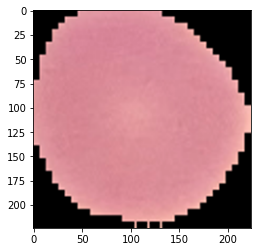

In [ ]:
plt.imshow(images[0], cmap='binary')

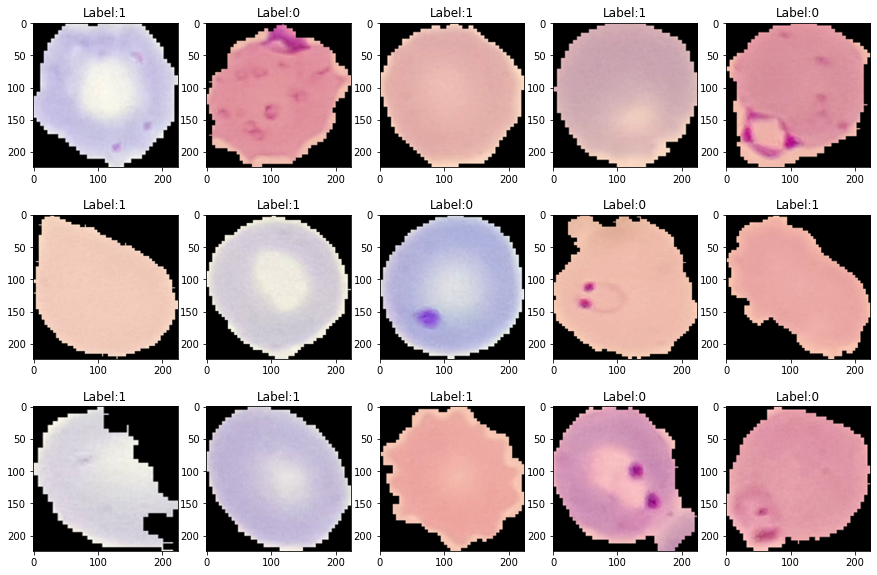

In [ ]:
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = images[i]
    fig.add_subplot(rows, columns, i)
    plt.title("Label:" + str(labels[i]))
    plt.imshow(img, cmap='binary')
plt.show()

In [ ]:
np.mean(labels)

## Baseline Model

Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results.

# To do:

1) Separate training and testing sets

2) Create a traditional neural network model for classification. Code examples are [here](https://colab.research.google.com/drive/1OGxD35fQxXdWNDwYGYpZcES5zgo6UvdO?authuser=1) for reference.

3) Plot your training and testing accuracy across epochs


## Challenge:

- Create another neural net with a different layer configuration. Does it improve performance?


In [ ]:
images_np = np.array(images)
labels_np = np.array(labels)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # flatten turns the 28x28 shape into one long array of pixels (784 pixels long)
  tf.keras.layers.Dense(30, activation='relu'), # hidden layer
  tf.keras.layers.Dense(20, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='softmax') # output layer
])

# compile model
model.compile(
    optimizer = 'adam', # for this course, we always use adam
    loss = 'sparse_categorical_crossentropy', # since this is classification, we use categorical crossentropy (rather than MSE)
    metrics=['accuracy']) # we'll evaluate based on the accuracy of our predictions

model.fit(images_np, labels_np, epochs = 5)

Epoch 1/5
125/125 [==============================] - 7s 48ms/step - loss: 126.3508 - accuracy: 0.5510
Epoch 2/5
125/125 [==============================] - 8s 63ms/step - loss: 72.9032 - accuracy: 0.5798
Epoch 3/5
125/125 [==============================] - 6s 46ms/step - loss: 41.3150 - accuracy: 0.6295
Epoch 4/5
125/125 [==============================] - 6s 46ms/step - loss: 36.1412 - accuracy: 0.5965
Epoch 5/5
125/125 [==============================] - 6s 46ms/step - loss: 9.5827 - accuracy: 0.6758


In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax') # output layer, 2 options
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

model2.fit(images, labels, epochs = 5)

Epoch 1/5
63/63 [==============================] - 5s 68ms/step - loss: 686.9710 - accuracy: 0.5295
Epoch 2/5
63/63 [==============================] - 4s 68ms/step - loss: 206.9736 - accuracy: 0.5445
Epoch 3/5
63/63 [==============================] - 4s 68ms/step - loss: 121.6522 - accuracy: 0.5525
Epoch 4/5
63/63 [==============================] - 4s 68ms/step - loss: 84.1570 - accuracy: 0.5630
Epoch 5/5
63/63 [==============================] - 4s 68ms/step - loss: 74.3960 - accuracy: 0.5540


## Advanced Model

Examples:
- Build a model that is more complex or can improve upon your predictions for classification.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=0)
print(X_train.shape)

print(X_test.shape)


(1400, 224, 224, 3)
(600, 224, 224, 3)


In [ ]:


model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters=32, # How many filters we will learn
        kernel_size=(3, 3), # Size of feature map that will slide over image
        strides=(1, 1), # How the feature map "steps" across the image
        padding='valid', # We are not using padding
        activation='relu', # Rectified Linear Unit Activation Function
        input_shape=(224, 224, 3) # The expected input shape for this layer
    )
)
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        strides=(4, 4) # How the pool "steps" across the feature
    )
)
model.add(
   tf.keras.layers.Dropout(
         rate=0.25 # Randomly disable 25% of neurons
     )
 )
model.add(
    tf.keras.layers.Flatten()
)
model.add(
    tf.keras.layers.Dense(
        units=128, # Output shape
        activation='relu' # Rectified Linear Unit Activation Function
    )
)
model.add(
    tf.keras.layers.Dense(
        units=2, # Output shape
        activation='softmax' # Softmax Activation Function
    )
)
# Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)
# Display a summary of the models structure
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               12845184  
                                                                 
 dense_17 (Dense)            (None, 2)                 258       
                                                      

In [ ]:
print(X_train.shape)

(1400, 224, 224, 3)


In [ ]:
# Train the CNN on the training data
history = model.fit(

      # Training data : features (images) and classes.
      X_train, y_train,

      # number of samples to work through before updating the
      # internal model parameters via back propagation.
      batch_size=256,

      # An epoch is an iteration over the entire training data.
      epochs=10,

      # The model will set apart his fraction of the training
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of
      # each epoch.
      validation_split=0.2,

      verbose=1)

Epoch 1/10
5/5 [==============================] - 28s 5s/step - loss: 2669.8608 - accuracy: 0.4973 - val_loss: 213.4932 - val_accuracy: 0.5143
Epoch 2/10
5/5 [==============================] - 26s 5s/step - loss: 81.9998 - accuracy: 0.5080 - val_loss: 26.2710 - val_accuracy: 0.4857
Epoch 3/10
5/5 [==============================] - 25s 5s/step - loss: 37.8154 - accuracy: 0.5188 - val_loss: 3.6851 - val_accuracy: 0.5393
Epoch 4/10
5/5 [==============================] - 25s 5s/step - loss: 10.7128 - accuracy: 0.5277 - val_loss: 20.7863 - val_accuracy: 0.5143
Epoch 5/10
5/5 [==============================] - 25s 5s/step - loss: 11.8137 - accuracy: 0.5527 - val_loss: 6.7159 - val_accuracy: 0.5786
Epoch 6/10
5/5 [==============================] - 25s 5s/step - loss: 6.4312 - accuracy: 0.6223 - val_loss: 12.8338 - val_accuracy: 0.4893
Epoch 7/10
5/5 [==============================] - 26s 5s/step - loss: 7.7329 - accuracy: 0.5866 - val_loss: 8.7813 - val_accuracy: 0.5179
Epoch 8/10
5/5 [======

## Model Tuning

Recall in Week 5, we discussed hyperparameters tuning. You can refer to this code [here](https://colab.research.google.com/drive/1BdW6zSQ2XAUcLI83CANcFBQaBw5WgepK).

## Performance Summary

Make a presentation of your result. You can refer to the syntax below.

Markdown | Preview
--- | ---
`**Model 1**` | **Model 2**
`*70%*` or `_italicized text_` | *90%*
`` `Monospace` `` | `Monospace`
`~~strikethrough~~` | ~~strikethrough~~
`[A link](https://www.google.com)` | [A link](https://www.google.com)
`![An image](https://www.google.com/images/rss.png)` | ![An image](https://www.google.com/images/rss.png)

More resources about creating tables in markdown of colab can be found [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk).

## Interpretation and Future Work

Present and also interpret your experimental performance. Comment on potential future work or research questions that your project leads to.